# Presidents Images Recognition


### Preparing data for machine learning

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import os
import PIL
from PIL import Image
import shutil
#!pip install joblib
import joblib
import json

In [2]:
#Initialize variables

path_to_data = "./raw_photos"
path_to_cr_data = "./dataset/cropped/"

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color   

In [4]:
def resize_images(image_path,basewidth):
    
    img = Image.open(image_path)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    img.save(image_path)

In [5]:
#Create subdirectories list
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
cropped_image_dirs = []
file_names_dict = {}
basewidth= 120
max_photos_per_category = 91

for img_dir in img_dirs:
    count=1
    president_name = img_dir.split('/')[-1]
    president_name = img_dir.split('\\')[-1]
    print(president_name)
    
    file_names_dict[president_name] =[]

    for entry in os.scandir(img_dir):
        entry_path = str(entry.path)
        print(entry_path)

        roi_color = get_cropped_image_if_2_eyes(str(entry.path))
        if roi_color is not None:
            cropped_folder = path_to_cr_data + president_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
                
            cropped_file_name = president_name + '_' + str(count) + ".png"
            cropped_file_path =cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            resize_images(cropped_file_path,basewidth)
            file_names_dict[president_name].append(cropped_file_path)
            count+=1
            
            if count== max_photos_per_category:
                break

aliev_ilham
./raw_photos\aliev_ilham\2Q__ (1).jpg
./raw_photos\aliev_ilham\2Q__ (2).jpg
./raw_photos\aliev_ilham\2Q__ (3).jpg
./raw_photos\aliev_ilham\2Q__ (4).jpg
./raw_photos\aliev_ilham\2Q__ (5).jpg
./raw_photos\aliev_ilham\2Q__ (6).jpg
./raw_photos\aliev_ilham\2Q__ (7).jpg
./raw_photos\aliev_ilham\2Q__.jpg
./raw_photos\aliev_ilham\9k_ (1).jpg
./raw_photos\aliev_ilham\9k_ (2).jpg
./raw_photos\aliev_ilham\9k_ (3).jpg
./raw_photos\aliev_ilham\9k_ (4).jpg
./raw_photos\aliev_ilham\9k_ (5).jpg
./raw_photos\aliev_ilham\9k_ (6).jpg
./raw_photos\aliev_ilham\9k_.jpg
./raw_photos\aliev_ilham\i (1).jpg
./raw_photos\aliev_ilham\i (10).jpg
./raw_photos\aliev_ilham\i (100).jpg
./raw_photos\aliev_ilham\i (11).jpg
./raw_photos\aliev_ilham\i (12).jpg
./raw_photos\aliev_ilham\i (13).jpg
./raw_photos\aliev_ilham\i (14).jpg
./raw_photos\aliev_ilham\i (15).jpg
./raw_photos\aliev_ilham\i (16).jpg
./raw_photos\aliev_ilham\i (17).jpg
./raw_photos\aliev_ilham\i (18).jpg
./raw_photos\aliev_ilham\i (19).jpg
.

./raw_photos\aliev_ilham\i - 2020-11-14T143139.927.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143142.143.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143143.585.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143144.292.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143145.028.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143149.859.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143150.560.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143151.489.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143152.371.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143153.211.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143154.029.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143155.553.jpg
./raw_photos\aliev_ilham\i - 2020-11-14T143156.501.jpg
erdogan_redgep
./raw_photos\erdogan_redgep\2Q__ (1).jpg
./raw_photos\erdogan_redgep\2Q__ (10).jpg
./raw_photos\erdogan_redgep\2Q__ (11).jpg
./raw_photos\erdogan_redgep\2Q__ (12).jpg
./raw_photos\erdogan_redgep\2Q__ (13).jpg
./raw_photos\erdogan_redgep\2Q__ (14).jpg
./raw_photos\erdoga

./raw_photos\erdogan_redgep\i (74).jpg
./raw_photos\erdogan_redgep\i (75).jpg
./raw_photos\erdogan_redgep\i (76).jpg
./raw_photos\erdogan_redgep\i (77).jpg
./raw_photos\erdogan_redgep\i (78).jpg
./raw_photos\erdogan_redgep\i (79).jpg
./raw_photos\erdogan_redgep\i (8).jpg
./raw_photos\erdogan_redgep\i (80).jpg
./raw_photos\erdogan_redgep\i (81).jpg
./raw_photos\erdogan_redgep\i (82).jpg
./raw_photos\erdogan_redgep\i (83).jpg
./raw_photos\erdogan_redgep\i (84).jpg
./raw_photos\erdogan_redgep\i (85).jpg
./raw_photos\erdogan_redgep\i (86).jpg
./raw_photos\erdogan_redgep\i (87).jpg
./raw_photos\erdogan_redgep\i (88).jpg
./raw_photos\erdogan_redgep\i (89).jpg
./raw_photos\erdogan_redgep\i (9).jpg
./raw_photos\erdogan_redgep\i (90).jpg
./raw_photos\erdogan_redgep\i (91).jpg
./raw_photos\erdogan_redgep\i (92).jpg
./raw_photos\erdogan_redgep\i (93).jpg
./raw_photos\erdogan_redgep\i (94).jpg
./raw_photos\erdogan_redgep\i (95).jpg
./raw_photos\erdogan_redgep\i (96).jpg
./raw_photos\erdogan_redgep

./raw_photos\erdogan_redgep\Z (14).jpg
./raw_photos\erdogan_redgep\Z (15).jpg
./raw_photos\erdogan_redgep\Z (16).jpg
./raw_photos\erdogan_redgep\Z (17).jpg
./raw_photos\erdogan_redgep\Z (18).jpg
./raw_photos\erdogan_redgep\Z (19).jpg
./raw_photos\erdogan_redgep\Z (2).jpg
./raw_photos\erdogan_redgep\Z (20).jpg
./raw_photos\erdogan_redgep\Z (21).jpg
./raw_photos\erdogan_redgep\Z (22).jpg
./raw_photos\erdogan_redgep\Z (23).jpg
./raw_photos\erdogan_redgep\Z (24).jpg
./raw_photos\erdogan_redgep\Z (25).jpg
./raw_photos\erdogan_redgep\Z (26).jpg
./raw_photos\erdogan_redgep\Z (27).jpg
./raw_photos\erdogan_redgep\Z (28).jpg
./raw_photos\erdogan_redgep\Z (29).jpg
./raw_photos\erdogan_redgep\Z (3).jpg
./raw_photos\erdogan_redgep\Z (30).jpg
./raw_photos\erdogan_redgep\Z (31).jpg
./raw_photos\erdogan_redgep\Z (32).jpg
./raw_photos\erdogan_redgep\Z (4).jpg
./raw_photos\erdogan_redgep\Z (5).jpg
./raw_photos\erdogan_redgep\Z (6).jpg
./raw_photos\erdogan_redgep\Z (7).jpg
./raw_photos\erdogan_redgep\Z (

./raw_photos\lukashenko_alexandr\i (16).jpg
./raw_photos\lukashenko_alexandr\i (17).jpg
./raw_photos\lukashenko_alexandr\i (18).jpg
./raw_photos\lukashenko_alexandr\i (19).jpg
./raw_photos\lukashenko_alexandr\i (2).jpg
./raw_photos\lukashenko_alexandr\i (20).jpg
./raw_photos\lukashenko_alexandr\i (21).jpg
./raw_photos\lukashenko_alexandr\i (22).jpg
./raw_photos\lukashenko_alexandr\i (23).jpg
./raw_photos\lukashenko_alexandr\i (24).jpg
./raw_photos\lukashenko_alexandr\i (25).jpg
./raw_photos\lukashenko_alexandr\i (26).jpg
./raw_photos\lukashenko_alexandr\i (27).jpg
./raw_photos\lukashenko_alexandr\i (28).jpg
./raw_photos\lukashenko_alexandr\i (29).jpg
./raw_photos\lukashenko_alexandr\i (3).jpg
./raw_photos\lukashenko_alexandr\i (30).jpg
./raw_photos\lukashenko_alexandr\i (31).jpg
./raw_photos\lukashenko_alexandr\i (32).jpg
./raw_photos\lukashenko_alexandr\i (33).jpg
./raw_photos\lukashenko_alexandr\i (34).jpg
./raw_photos\lukashenko_alexandr\i (35).jpg
./raw_photos\lukashenko_alexandr\i

./raw_photos\lukashenko_alexandr\images (27).jpg
./raw_photos\lukashenko_alexandr\images (28).jpg
./raw_photos\lukashenko_alexandr\images (29).jpg
./raw_photos\lukashenko_alexandr\images (3).jpg
./raw_photos\lukashenko_alexandr\images (30).jpg
./raw_photos\lukashenko_alexandr\images (31).jpg
./raw_photos\lukashenko_alexandr\images (32).jpg
./raw_photos\lukashenko_alexandr\images (33).jpg
./raw_photos\lukashenko_alexandr\images (34).jpg
./raw_photos\lukashenko_alexandr\images (35).jpg
./raw_photos\lukashenko_alexandr\images (36).jpg
./raw_photos\lukashenko_alexandr\images (37).jpg
./raw_photos\lukashenko_alexandr\images (38).jpg
./raw_photos\lukashenko_alexandr\images (39).jpg
./raw_photos\lukashenko_alexandr\images (4).jpg
./raw_photos\lukashenko_alexandr\images (40).jpg
./raw_photos\lukashenko_alexandr\images (41).jpg
./raw_photos\lukashenko_alexandr\images (42).jpg
./raw_photos\lukashenko_alexandr\images (43).jpg
./raw_photos\lukashenko_alexandr\images (44).jpg
./raw_photos\lukashenk

./raw_photos\makron_emmanuel\i (50).jpg
./raw_photos\makron_emmanuel\i (51).jpg
./raw_photos\makron_emmanuel\i (52).jpg
./raw_photos\makron_emmanuel\i (53).jpg
./raw_photos\makron_emmanuel\i (54).jpg
./raw_photos\makron_emmanuel\i (55).jpg
./raw_photos\makron_emmanuel\i (56).jpg
./raw_photos\makron_emmanuel\i (57).jpg
./raw_photos\makron_emmanuel\i (58).jpg
./raw_photos\makron_emmanuel\i (59).jpg
./raw_photos\makron_emmanuel\i (6).jpg
./raw_photos\makron_emmanuel\i (60).jpg
./raw_photos\makron_emmanuel\i (61).jpg
./raw_photos\makron_emmanuel\i (62).jpg
./raw_photos\makron_emmanuel\i (63).jpg
./raw_photos\makron_emmanuel\i (64).jpg
./raw_photos\makron_emmanuel\i (65).jpg
./raw_photos\makron_emmanuel\i (66).jpg
./raw_photos\makron_emmanuel\i (67).jpg
./raw_photos\makron_emmanuel\i (68).jpg
./raw_photos\makron_emmanuel\i (69).jpg
./raw_photos\makron_emmanuel\i (7).jpg
./raw_photos\makron_emmanuel\i (70).jpg
./raw_photos\makron_emmanuel\i (71).jpg
./raw_photos\makron_emmanuel\i (72).jpg
./

./raw_photos\merkel_angela\images (4).jpg
./raw_photos\merkel_angela\images (40).jpg
./raw_photos\merkel_angela\images (41).jpg
./raw_photos\merkel_angela\images (42).jpg
./raw_photos\merkel_angela\images (43).jpg
./raw_photos\merkel_angela\images (44).jpg
./raw_photos\merkel_angela\images (45).jpg
./raw_photos\merkel_angela\images (46).jpg
./raw_photos\merkel_angela\images (47).jpg
./raw_photos\merkel_angela\images (48).jpg
./raw_photos\merkel_angela\images (49).jpg
./raw_photos\merkel_angela\images (5).jpg
./raw_photos\merkel_angela\images (50).jpg
./raw_photos\merkel_angela\images (51).jpg
./raw_photos\merkel_angela\images (52).jpg
./raw_photos\merkel_angela\images (53).jpg
./raw_photos\merkel_angela\images (54).jpg
./raw_photos\merkel_angela\images (55).jpg
./raw_photos\merkel_angela\images (56).jpg
./raw_photos\merkel_angela\images (57).jpg
./raw_photos\merkel_angela\images (58).jpg
./raw_photos\merkel_angela\images (59).jpg
./raw_photos\merkel_angela\images (6).jpg
./raw_photos\m

./raw_photos\putin_vladimir\i (72).jpg
./raw_photos\putin_vladimir\i (73).jpg
./raw_photos\putin_vladimir\i (74).jpg
./raw_photos\putin_vladimir\i (75).jpg
./raw_photos\putin_vladimir\i (76).jpg
./raw_photos\putin_vladimir\i (77).jpg
./raw_photos\putin_vladimir\i (78).jpg
./raw_photos\putin_vladimir\i (79).jpg
./raw_photos\putin_vladimir\i (8).jpg
./raw_photos\putin_vladimir\i (80).jpg
./raw_photos\putin_vladimir\i (81).jpg
./raw_photos\putin_vladimir\i (82).jpg
./raw_photos\putin_vladimir\i (83).jpg
./raw_photos\putin_vladimir\i (84).jpg
./raw_photos\putin_vladimir\i (85).jpg
./raw_photos\putin_vladimir\i (86).jpg
./raw_photos\putin_vladimir\i (87).jpg
./raw_photos\putin_vladimir\i (88).jpg
./raw_photos\putin_vladimir\i (89).jpg
./raw_photos\putin_vladimir\i (9).jpg
./raw_photos\putin_vladimir\i (90).jpg
./raw_photos\putin_vladimir\i (91).jpg
./raw_photos\putin_vladimir\i (92).jpg
./raw_photos\putin_vladimir\i (93).jpg
./raw_photos\putin_vladimir\i (94).jpg
./raw_photos\putin_vladimir

./raw_photos\sin_ji_pin\i (4).jpg
./raw_photos\sin_ji_pin\i (40).jpg
./raw_photos\sin_ji_pin\i (41).jpg
./raw_photos\sin_ji_pin\i (42).jpg
./raw_photos\sin_ji_pin\i (43).jpg
./raw_photos\sin_ji_pin\i (44).jpg
./raw_photos\sin_ji_pin\i (45).jpg
./raw_photos\sin_ji_pin\i (46).jpg
./raw_photos\sin_ji_pin\i (47).jpg
./raw_photos\sin_ji_pin\i (48).jpg
./raw_photos\sin_ji_pin\i (49).jpg
./raw_photos\sin_ji_pin\i (5).jpg
./raw_photos\sin_ji_pin\i (50).jpg
./raw_photos\sin_ji_pin\i (51).jpg
./raw_photos\sin_ji_pin\i (52).jpg
./raw_photos\sin_ji_pin\i (53).jpg
./raw_photos\sin_ji_pin\i (54).jpg
./raw_photos\sin_ji_pin\i (55).jpg
./raw_photos\sin_ji_pin\i (56).jpg
./raw_photos\sin_ji_pin\i (57).jpg
./raw_photos\sin_ji_pin\i (58).jpg
./raw_photos\sin_ji_pin\i (59).jpg
./raw_photos\sin_ji_pin\i (6).jpg
./raw_photos\sin_ji_pin\i (60).jpg
./raw_photos\sin_ji_pin\i (61).jpg
./raw_photos\sin_ji_pin\i (62).jpg
./raw_photos\sin_ji_pin\i (63).jpg
./raw_photos\sin_ji_pin\i (64).jpg
./raw_photos\sin_ji_pin

./raw_photos\sin_ji_pin\p1_5df01b81 (3).png
./raw_photos\sin_ji_pin\p1_5df01b81 (4).png
./raw_photos\sin_ji_pin\p1_5df01b81 (5).png
./raw_photos\sin_ji_pin\p1_5df01b81.png
./raw_photos\sin_ji_pin\photo.png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp (1).png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp (2).png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp (3).png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp (4).png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp (5).png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp (6).png
./raw_photos\sin_ji_pin\photo_camera_grey600_24dp.png
./raw_photos\sin_ji_pin\Z (1).jpg
./raw_photos\sin_ji_pin\Z (10).jpg
./raw_photos\sin_ji_pin\Z (11).jpg
./raw_photos\sin_ji_pin\Z (12).jpg
./raw_photos\sin_ji_pin\Z (13).jpg
./raw_photos\sin_ji_pin\Z (14).jpg
./raw_photos\sin_ji_pin\Z (15).jpg
./raw_photos\sin_ji_pin\Z (16).jpg
./raw_photos\sin_ji_pin\Z (17).jpg
./raw_photos\sin_ji_pin\Z (18).jpg
./raw_photos\sin_ji_pin\Z (19).jpg
./raw_ph

./raw_photos\trump_donald\i (85).jpg
./raw_photos\trump_donald\i (86).jpg
./raw_photos\trump_donald\i (87).jpg
./raw_photos\trump_donald\i (88).jpg
./raw_photos\trump_donald\i (89).jpg
./raw_photos\trump_donald\i (9).jpg
./raw_photos\trump_donald\i (90).jpg
./raw_photos\trump_donald\i (91).jpg
./raw_photos\trump_donald\i (92).jpg
./raw_photos\trump_donald\i (93).jpg
./raw_photos\trump_donald\i (94).jpg
./raw_photos\trump_donald\i (95).jpg
./raw_photos\trump_donald\i (96).jpg
./raw_photos\trump_donald\i (97).jpg
./raw_photos\trump_donald\i (98).jpg
./raw_photos\trump_donald\i (99).jpg
./raw_photos\trump_donald\i - 2020-11-14T160045.813.jpg
./raw_photos\trump_donald\i - 2020-11-14T160124.269.jpg
./raw_photos\trump_donald\i - 2020-11-14T160124.908.jpg
./raw_photos\trump_donald\i - 2020-11-14T160126.538.jpg
./raw_photos\trump_donald\i - 2020-11-14T160127.669.jpg
./raw_photos\trump_donald\i - 2020-11-14T160128.971.jpg
./raw_photos\trump_donald\i - 2020-11-14T160129.930.jpg
./raw_photos\trum

./raw_photos\trump_donald\i - 2020-11-14T160337.979.jpg
./raw_photos\trump_donald\i - 2020-11-14T160338.582.jpg
./raw_photos\trump_donald\i - 2020-11-14T160339.083.jpg
./raw_photos\trump_donald\i - 2020-11-14T160339.464.jpg
./raw_photos\trump_donald\i - 2020-11-14T160344.014.jpg
./raw_photos\trump_donald\i - 2020-11-14T160345.477.jpg
./raw_photos\trump_donald\i - 2020-11-14T160347.172.jpg
./raw_photos\trump_donald\i - 2020-11-14T160350.498.jpg
./raw_photos\trump_donald\i - 2020-11-14T160351.205.jpg
./raw_photos\trump_donald\i - 2020-11-14T160351.805.jpg
./raw_photos\trump_donald\i - 2020-11-14T160353.487.jpg
./raw_photos\trump_donald\i - 2020-11-14T160357.101.jpg
./raw_photos\trump_donald\i - 2020-11-14T160357.452.jpg
./raw_photos\trump_donald\i - 2020-11-14T160357.952.jpg
./raw_photos\trump_donald\i - 2020-11-14T160358.458.jpg
./raw_photos\trump_donald\i - 2020-11-14T160358.622.jpg
./raw_photos\trump_donald\i - 2020-11-14T160358.960.jpg
./raw_photos\trump_donald\i - 2020-11-14T160400.

./raw_photos\zelenski_vladimir\i (48).jpg
./raw_photos\zelenski_vladimir\i (49).jpg
./raw_photos\zelenski_vladimir\i (5).jpg
./raw_photos\zelenski_vladimir\i (50).jpg
./raw_photos\zelenski_vladimir\i (51).jpg
./raw_photos\zelenski_vladimir\i (52).jpg
./raw_photos\zelenski_vladimir\i (53).jpg
./raw_photos\zelenski_vladimir\i (54).jpg
./raw_photos\zelenski_vladimir\i (55).jpg
./raw_photos\zelenski_vladimir\i (56).jpg
./raw_photos\zelenski_vladimir\i (57).jpg
./raw_photos\zelenski_vladimir\i (58).jpg
./raw_photos\zelenski_vladimir\i (59).jpg
./raw_photos\zelenski_vladimir\i (6).jpg
./raw_photos\zelenski_vladimir\i (60).jpg
./raw_photos\zelenski_vladimir\i (61).jpg
./raw_photos\zelenski_vladimir\i (62).jpg
./raw_photos\zelenski_vladimir\i (63).jpg
./raw_photos\zelenski_vladimir\i (64).jpg
./raw_photos\zelenski_vladimir\i (65).jpg
./raw_photos\zelenski_vladimir\i (66).jpg
./raw_photos\zelenski_vladimir\i (67).jpg
./raw_photos\zelenski_vladimir\i (68).jpg
./raw_photos\zelenski_vladimir\i (69

### Data Preparation for Machine Learning

In [7]:
import numpy as np
import pywt
import cv2

In [8]:
def w2d(img, mode='haar', level=1):
    imArray = img
    
    #Datatype conversions
    #convert to grayscale
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #Convert to float
    imArray = np.float32(imArray)
    imArray /=255;
    #Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H  

In [9]:
def get_category_numbers(file_names_dict):
    class_dict={}
    count=0
    for president_name in file_names_dict.keys():
        class_dict[president_name] = count
        count= count+1
    return class_dict    

In [10]:
def get_category_numbers_static():
    class_dict={'aliev_ilham':0, 'erdogan_redgep':1, 'lukashenko_alexandr': 2, 'makron_emmanuel': 3, 'merkel_angela':4,
               'putin_vladimir':5, 'sin_ji_pin':6, 'trump_donald':7, 'zelenski_vladimir':8}

    return class_dict  

In [11]:
#class_dict = get_category_numbers(file_names_dict)
class_dict = get_category_numbers_static()

In [12]:
class_dict

{'aliev_ilham': 0,
 'erdogan_redgep': 1,
 'lukashenko_alexandr': 2,
 'makron_emmanuel': 3,
 'merkel_angela': 4,
 'putin_vladimir': 5,
 'sin_ji_pin': 6,
 'trump_donald': 7,
 'zelenski_vladimir': 8}

In [13]:
X=[]
y=[]
max_photos_per_category = 91


for president_name, training_files in file_names_dict.items():
    print("{0} ".format(president_name,training_files))
    counter = 0
    for training_image in training_files:
        print(training_image)
        #Read an image
        img = cv2.imread(training_image)
        if img is None:
            continue
        #scaling the images
        scaled_raw_img = cv2.resize(img,(32,32))
        #Get wavelet Transformed image
        img_har = w2d(img,'db1',5)
        #Scale img haar
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[president_name])
        
        counter +=1
        
        if counter== max_photos_per_category:
            break

aliev_ilham 
./dataset/cropped/aliev_ilham/aliev_ilham_1.png
./dataset/cropped/aliev_ilham/aliev_ilham_2.png
./dataset/cropped/aliev_ilham/aliev_ilham_3.png
./dataset/cropped/aliev_ilham/aliev_ilham_4.png
./dataset/cropped/aliev_ilham/aliev_ilham_5.png
./dataset/cropped/aliev_ilham/aliev_ilham_6.png
./dataset/cropped/aliev_ilham/aliev_ilham_7.png
./dataset/cropped/aliev_ilham/aliev_ilham_8.png
./dataset/cropped/aliev_ilham/aliev_ilham_9.png
./dataset/cropped/aliev_ilham/aliev_ilham_10.png
./dataset/cropped/aliev_ilham/aliev_ilham_11.png
./dataset/cropped/aliev_ilham/aliev_ilham_12.png
./dataset/cropped/aliev_ilham/aliev_ilham_13.png
./dataset/cropped/aliev_ilham/aliev_ilham_14.png
./dataset/cropped/aliev_ilham/aliev_ilham_15.png
./dataset/cropped/aliev_ilham/aliev_ilham_16.png
./dataset/cropped/aliev_ilham/aliev_ilham_17.png
./dataset/cropped/aliev_ilham/aliev_ilham_18.png
./dataset/cropped/aliev_ilham/aliev_ilham_19.png
./dataset/cropped/aliev_ilham/aliev_ilham_20.png
./dataset/croppe

./dataset/cropped/erdogan_redgep/erdogan_redgep_79.png
./dataset/cropped/erdogan_redgep/erdogan_redgep_80.png
./dataset/cropped/erdogan_redgep/erdogan_redgep_81.png
./dataset/cropped/erdogan_redgep/erdogan_redgep_82.png
./dataset/cropped/erdogan_redgep/erdogan_redgep_83.png
./dataset/cropped/erdogan_redgep/erdogan_redgep_84.png
./dataset/cropped/erdogan_redgep/erdogan_redgep_85.png
lukashenko_alexandr 
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_1.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_2.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_3.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_4.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_5.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_6.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_7.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_8.png
./dataset/cropped/lukashenko_alexandr/lukashenko_alexandr_9.png
./dataset/cropped/

./dataset/cropped/makron_emmanuel/makron_emmanuel_43.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_44.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_45.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_46.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_47.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_48.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_49.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_50.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_51.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_52.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_53.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_54.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_55.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_56.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_57.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_58.png
./dataset/cropped/makron_emmanuel/makron_emmanuel_59.png
./dataset/cropped/makron_emmanu

./dataset/cropped/putin_vladimir/putin_vladimir_52.png
./dataset/cropped/putin_vladimir/putin_vladimir_53.png
./dataset/cropped/putin_vladimir/putin_vladimir_54.png
./dataset/cropped/putin_vladimir/putin_vladimir_55.png
./dataset/cropped/putin_vladimir/putin_vladimir_56.png
./dataset/cropped/putin_vladimir/putin_vladimir_57.png
./dataset/cropped/putin_vladimir/putin_vladimir_58.png
./dataset/cropped/putin_vladimir/putin_vladimir_59.png
./dataset/cropped/putin_vladimir/putin_vladimir_60.png
./dataset/cropped/putin_vladimir/putin_vladimir_61.png
./dataset/cropped/putin_vladimir/putin_vladimir_62.png
./dataset/cropped/putin_vladimir/putin_vladimir_63.png
./dataset/cropped/putin_vladimir/putin_vladimir_64.png
./dataset/cropped/putin_vladimir/putin_vladimir_65.png
./dataset/cropped/putin_vladimir/putin_vladimir_66.png
./dataset/cropped/putin_vladimir/putin_vladimir_67.png
./dataset/cropped/putin_vladimir/putin_vladimir_68.png
./dataset/cropped/putin_vladimir/putin_vladimir_69.png
./dataset/

./dataset/cropped/trump_donald/trump_donald_46.png
./dataset/cropped/trump_donald/trump_donald_47.png
./dataset/cropped/trump_donald/trump_donald_48.png
./dataset/cropped/trump_donald/trump_donald_49.png
./dataset/cropped/trump_donald/trump_donald_50.png
./dataset/cropped/trump_donald/trump_donald_51.png
./dataset/cropped/trump_donald/trump_donald_52.png
./dataset/cropped/trump_donald/trump_donald_53.png
./dataset/cropped/trump_donald/trump_donald_54.png
./dataset/cropped/trump_donald/trump_donald_55.png
./dataset/cropped/trump_donald/trump_donald_56.png
./dataset/cropped/trump_donald/trump_donald_57.png
./dataset/cropped/trump_donald/trump_donald_58.png
./dataset/cropped/trump_donald/trump_donald_59.png
./dataset/cropped/trump_donald/trump_donald_60.png
./dataset/cropped/trump_donald/trump_donald_61.png
./dataset/cropped/trump_donald/trump_donald_62.png
./dataset/cropped/trump_donald/trump_donald_63.png
./dataset/cropped/trump_donald/trump_donald_64.png
./dataset/cropped/trump_donald/

In [14]:
#Convert to float and reshape to make sure the shape is correct
X=np.array(X).reshape(len(X), len(X[0])).astype(float)
X.shape

(774, 4096)

### Training the model.

#### 1. SVM with rbf kernel tuned with heuristic finetuning

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Scale data
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf',C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8626609442060086

In [17]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.72      0.96      0.82        24
           2       0.95      0.83      0.88        23
           3       0.63      0.77      0.69        22
           4       1.00      0.89      0.94        18
           5       0.93      0.93      0.93        29
           6       1.00      0.89      0.94        28
           7       0.91      0.83      0.87        24
           8       0.75      0.75      0.75        32

    accuracy                           0.86       233
   macro avg       0.88      0.86      0.87       233
weighted avg       0.88      0.86      0.87       233



#### Using GridSearchCV

In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
#Define different candidate models
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto', probability=True)
        , 'params': {
            
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    }
    ,
    
    'random_forest': {
        'model': RandomForestClassifier()
        , 'params':{
            
            'randomforestclassifier__n_estimators':[1,5,10]
        }       
    }
    ,
    
    'logistic_regression':{
        
        'model': LogisticRegression(solver='liblinear', multi_class='auto')
        , 'params':{
            
            'logisticregression__C':[1,5,10]
        }   
    }
}

In [20]:
# GridSearchCV learning:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

df 

,model,best_score,best_params
0,svm,0.892796,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.669079,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.894597,{'logisticregression__C': 1}


In [21]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

#### Evaluating models with best parameters on test data

In [22]:
svm_acc = best_estimators['svm'].score(X_test, y_test)

In [23]:
random_forest_acc = best_estimators['random_forest'].score(X_test, y_test)

In [24]:
logistic_regression_acc = best_estimators['logistic_regression'].score(X_test, y_test)

In [25]:
best_clf = best_estimators['svm']

In [26]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))

cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  1,  0,  0,  0,  0,  0],
       [ 3,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0, 21,  0],
       [ 0,  2,  0,  3,  0,  0,  1,  1, 25]], dtype=int64)

Text(69.0, 0.5, 'Truth')

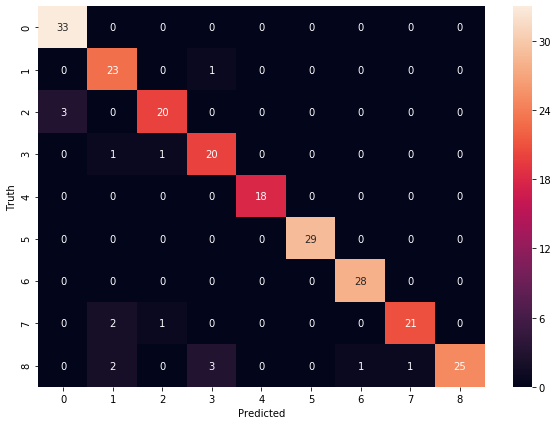

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Save best trained ml model

In [28]:
#Save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

#### Save class library

In [29]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

# DEEP LEARNING

### CNN Network

In [30]:
import itertools

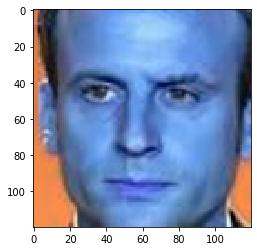

In [31]:
#Read Images into memory
img_name = 'makron_emmanuel_13.png'

img_full_path = './dataset/cropped/makron_emmanuel/' + img_name
img = cv2.imread(img_full_path)
plt.imshow(img)

### Creating dataset special structure for deep neural network

#### Main functions

In [32]:
def get_prepared_images_to_dict(prepared_images_dir_path, categry_names):
    
    samples_dict = {}

    for category in categry_names:
        #print(category)
        category_dir = prepared_images_dir_path + category + '/'
        #print(category_dir)
        category_info = {}
        
        category_samples_list = []
        for entry in os.scandir(category_dir):
            entry_path = str(entry.path)
            #print(entry_path)
            img = cv2.imread(entry_path)
            category_samples_list.append(img)

                
        category_info = {'category_path' : category_dir, 'category_samples_list':category_samples_list}
        samples_dict[category] = category_info

    return samples_dict

In [33]:
def create_dataset_folder_structure_for_deep_nn(categry_names,dataset_types_list):

    if not os.path.exists(core_directory_for_deep_nn_dataset):
        os.mkdir(core_directory_for_deep_nn_dataset)
        #print("Directory " , core_directory_for_deep_nn_dataset ,  " Created ")

        for datset_type in dataset_types_list:
            #print(datset_type)
            os.mkdir(core_directory_for_deep_nn_dataset + datset_type)

            for category_name in categry_names:
                #print(category_name)
                os.mkdir(core_directory_for_deep_nn_dataset + datset_type + "/" + category_name)
                
        print('Dataset structure created..')
    else:    
        print("Directory " , core_directory_for_deep_nn_dataset ,  " already exists")

In [34]:
def get_samples_stats(samples_dict,prcnt_test_samples):
    categories_samples_stats = {}

    for category_name in samples_dict:
        samples_total = len(samples_dict[category_name]['category_samples_list'])
        train_qty = int((1-prcnt_test_samples) * samples_total)
        test_qty = samples_total - train_qty
        categories_samples_stats[category_name] = {'samples_total' : samples_total, 'train_qty': train_qty, 'test_qty': test_qty}

    return categories_samples_stats

In [35]:
def move_imgs_to_new_structure(dataset_types_list, categry_names,core_directory_for_deep_nn_dataset):

    for dataset_type in dataset_types_list:
        print(dataset_type)

        for category_name in categry_names:
            print(category_name)

            total_samples_qty = categories_samples_stats[category_name]['samples_total']
            train_qty = categories_samples_stats[category_name]['train_qty']
            test_qty = categories_samples_stats[category_name]['test_qty']


            print("category_name: {0} total_samples_qty: {1} train_qty: {2} test_qty: {3}".format(category_name, total_samples_qty,train_qty,test_qty))

            if dataset_type =="train":
                img_set = samples_dict[category_name]['category_samples_list'][0:train_qty]
            else:
                img_set = samples_dict[category_name]['category_samples_list'][train_qty:]

            #Moving images for training
            i=1
            for img in img_set:
                target_file_path = core_directory_for_deep_nn_dataset + dataset_type + "/" + category_name + "/" + str(i) + ".png"
                print(target_file_path)
                cv2.imwrite(target_file_path, img)
                i+=1
                
    print('Images have been successfully moved to structure with train and test set folders!!')    

In [36]:
def create_histogram(labels,scores):

    scores_1 = cnn1.evaluate(test_set,verbose=0)
    scores_2 = cnn2.evaluate(test_set,verbose=0)
    scores_3 = cnn3.evaluate(test_set,verbose=0)

    x = labels
    y = np.array(scores)

    fig, ax = plt.subplots()

    ax.bar(x, y)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure

    plt.show()

In [37]:
def get_epochs_statistics(train_histories,epochs_p):
    
    history_dict_1 = train_histories[0]
    history_dict_2 = train_histories[1]
    history_dict_3 = train_histories[2]
    
    acc_values_1 = history_dict_1["accuracy"]
    acc_values_2 = history_dict_2["accuracy"]
    acc_values_3 = history_dict_3["accuracy"]
    
    epochs = range(1, epochs_p + 1)

    plt.plot(epochs, acc_values_1, "b", label="A-1")
    plt.plot(epochs, acc_values_2, "r", label="A-2")
    plt.plot(epochs, acc_values_3, "g", label="A-3")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Graphs")
    plt.show()
    
    loss_values_1 = history_dict_1["loss"]
    loss_values_2 = history_dict_2["loss"]
    loss_values_3 = history_dict_3["loss"]

    plt.plot(epochs, loss_values_1, "b", label="A-1")
    plt.plot(epochs, loss_values_2, "r", label="A-2")
    plt.plot(epochs, loss_values_3, "g", label="A-3")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Graphs")
    plt.show()
    
    loss_values_1 = history_dict_1["val_accuracy"]
    loss_values_2 = history_dict_2["val_accuracy"]
    loss_values_3 = history_dict_3["val_accuracy"]

    plt.plot(epochs, loss_values_1, "b", label="A-1")
    plt.plot(epochs, loss_values_2, "r", label="A-2")
    plt.plot(epochs, loss_values_3, "g", label="A-3")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Validation Accuracy Graphs")
    plt.show()
    
    loss_values_1 = history_dict_1["val_loss"]
    loss_values_2 = history_dict_2["val_loss"]
    loss_values_3 = history_dict_3["val_loss"]

    plt.plot(epochs, loss_values_1, "b", label="A-1")
    plt.plot(epochs, loss_values_2, "r", label="A-2")
    plt.plot(epochs, loss_values_3, "g", label="A-3")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.title("Validation Loss Graphs")
    plt.show()

In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
def get_confusion_matrix(model, model_name):
    cnn = model

    #Confution Matrix
    Y_pred = cnn.predict_generator(train_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix Training Set ' + model_name)
    cm = confusion_matrix(train_generator.classes, y_pred)
    plot_confusion_matrix(cm, target_names, title='Confusion Matrix Train Set ' + model_name)


    Y_pred = cnn.predict_generator(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix Test Set ' + model_name)
    cm = confusion_matrix(test_generator.classes, y_pred)
    plot_confusion_matrix(cm, target_names, title='Confusion Matrix Test Set ' + model_name)

In [83]:
def get_metrics(model, model_name):
    cnn=model
    #Import metrics
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import cohen_kappa_score
    from sklearn.metrics import roc_auc_score
    
    print('model_name: ' + model_name)
    print('\n')
    # predict probabilities for test set
    yhat_probs = cnn.predict(test_set, verbose=0)
    # predict crisp classes for test set
    yhat_classes = cnn.predict_classes(test_set, verbose=0)
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    #yhat_classes = yhat_classes[:, 0]
    #Print the Target names

    testy = test_generator.classes

    # print(target_names)
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy -  (tp + tn) / (p + n) : %f' % accuracy)
    # precision tp / (tp + fp)
    print('\n')
    precision = precision_score(testy, yhat_classes,average='macro')
    print('Precision -  tp / (tp + fp): %f' % precision)
    print('\n')
    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes,average='macro')
    print('Rrecall -  tp / (tp + fn): %f' % recall)
    print('\n')
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes,average='macro')
    print('F1 score -  2 tp / (2 tp + fp + fn): %f' % f1)
    print('\n')
    # kappa
    kappa = cohen_kappa_score(testy, yhat_classes)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    #auc = roc_auc_score(testy, yhat_probs,multi_class ='ovr')
    #print('ROC AUC: %f' % auc)
    # confusion matrix
    print('\n')
    matrix = confusion_matrix(testy, yhat_classes)
    print(matrix)    

In [69]:
def evaluating_set(model, model_name):
    
    print(model_name + ':')
    print('\n')
    model.evaluate(test_set)
    model.evaluate(training_set)
    print('\n')

## Control flow for creating dataset for deep learning

In [39]:
with open("class_dictionary.json", "r") as read_file:
    categry_names = json.load(read_file)

prepared_images_dir_path = './dataset/cropped/'
core_directory_for_deep_nn_dataset = './dataset/deep_nn_dataset_structure/'
dataset_types_list = ['train', 'test']
prcnt_test_samples = 0.3

create_dataset_folder_structure_for_deep_nn(categry_names,dataset_types_list)
samples_dict = get_prepared_images_to_dict(prepared_images_dir_path,categry_names)
categories_samples_stats = get_samples_stats(samples_dict,prcnt_test_samples)
move_imgs_to_new_structure(dataset_types_list, categry_names,core_directory_for_deep_nn_dataset)

Directory  ./dataset/deep_nn_dataset_structure/  already exists
train
aliev_ilham
category_name: aliev_ilham total_samples_qty: 90 train_qty: 62 test_qty: 28
./dataset/deep_nn_dataset_structure/train/aliev_ilham/1.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/2.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/3.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/4.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/5.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/6.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/7.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/8.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/9.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/10.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/11.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/12.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/13.png
./dataset/deep_nn_dataset_structure/train/aliev_ilham/14.p

./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/28.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/29.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/30.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/31.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/32.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/33.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/34.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/35.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/36.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/37.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/38.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/39.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/40.png
./dataset/deep_nn_dataset_structure/train/lukashenko_alexandr/41.png
./dataset/deep_nn_dataset_structur

./dataset/deep_nn_dataset_structure/train/sin_ji_pin/21.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/22.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/23.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/24.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/25.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/26.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/27.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/28.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/29.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/30.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/31.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/32.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/33.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/34.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/35.png
./dataset/deep_nn_dataset_structure/train/sin_ji_pin/36.png
./dataset/deep_nn_dataset_structure/trai

./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/6.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/7.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/8.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/9.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/10.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/11.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/12.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/13.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/14.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/15.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/16.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/17.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/18.png
./dataset/deep_nn_dataset_structure/test/lukashenko_alexandr/19.png
./dataset/deep_nn_dataset_structure/test/lukashenko_

In [40]:
#Showing sample img files statistics for info
categories_samples_stats

{'aliev_ilham': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28},
 'erdogan_redgep': {'samples_total': 85, 'train_qty': 59, 'test_qty': 26},
 'lukashenko_alexandr': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28},
 'makron_emmanuel': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28},
 'merkel_angela': {'samples_total': 59, 'train_qty': 41, 'test_qty': 18},
 'putin_vladimir': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28},
 'sin_ji_pin': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28},
 'trump_donald': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28},
 'zelenski_vladimir': {'samples_total': 90, 'train_qty': 62, 'test_qty': 28}}

#### Part 1 - Data Preprocessing
#### Preprocessing the Training and Test sets with ImageDataGenerator

In [41]:
#Parameters
img_rows = 32
img_cols = 32
batch_size = 10

In [42]:
from keras.preprocessing.image import ImageDataGenerator

# Preprocessing the Train set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(core_directory_for_deep_nn_dataset + 'train',
                                                 target_size = (img_rows, img_cols),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(core_directory_for_deep_nn_dataset + 'test',
                                            target_size = (img_rows, img_cols),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 534 images belonging to 9 classes.
Found 240 images belonging to 9 classes.


### CNN Parameters

In [43]:
epochs = 20

#### CNN 1 Architecture (General)

In [44]:
#Архитектура заключается в удваивании количества фильтров с каждым новым слоем

In [45]:
# Importing the libraries
import tensorflow as tf
tf.__version__
import itertools  

# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[img_rows, img_cols, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=9, activation='softmax'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Training the CNN on the Training set and evaluating it on the Test set
train_stats_1 = cnn.fit(x = training_set, validation_data = test_set, epochs = epochs)

cnn1=cnn

Epoch 1/20
54/54 [==============================] - 10s 185ms/step - loss: 2.2049 - accuracy: 0.1236 - val_loss: 2.1877 - val_accuracy: 0.1625
Epoch 2/20
54/54 [==============================] - 2s 33ms/step - loss: 2.1711 - accuracy: 0.1929 - val_loss: 2.0988 - val_accuracy: 0.2542
Epoch 3/20
54/54 [==============================] - 2s 29ms/step - loss: 2.0114 - accuracy: 0.2772 - val_loss: 1.7456 - val_accuracy: 0.2042
Epoch 4/20
54/54 [==============================] - 2s 30ms/step - loss: 1.4386 - accuracy: 0.5187 - val_loss: 1.0500 - val_accuracy: 0.6833
Epoch 5/20
54/54 [==============================] - 2s 37ms/step - loss: 0.9674 - accuracy: 0.7022 - val_loss: 0.6779 - val_accuracy: 0.7958
Epoch 6/20
54/54 [==============================] - 2s 37ms/step - loss: 0.7585 - accuracy: 0.7509 - val_loss: 0.6272 - val_accuracy: 0.7792
Epoch 7/20
54/54 [==============================] - 2s 29ms/step - loss: 0.6337 - accuracy: 0.7903 - val_loss: 0.5567 - val_accuracy: 0.8417
Epoch 8/20


### CNN 2 Architecture

In [46]:
#Поменяем размер фильтров

In [47]:
cnn = tf.keras.models.Sequential([
    #cnn
    tf.keras.layers.Conv2D(filters=32, kernel_size = (10,10), activation='relu', input_shape = (img_rows, img_cols, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size = (10,10), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    #Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9,activation= 'softmax')
])

cnn.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = 'accuracy')

# Training the CNN on the Training set and evaluating it on the Test set
#train_stats_2 = cnn.fit(x = training_set, validation_data = test_set, epochs = epochs)

#Train the model
train_stats_2 = cnn.fit_generator(training_set, steps_per_epoch=20, validation_data=test_set, validation_steps=4, epochs=epochs)

cnn2=cnn

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
20/20 [==============================] - 1s 48ms/step - loss: 2.2171 - accuracy: 0.1150 - val_loss: 2.1968 - val_accuracy: 0.1500
Epoch 2/20
20/20 [==============================] - 1s 38ms/step - loss: 2.1976 - accuracy: 0.1100 - val_loss: 2.1969 - val_accuracy: 0.1500
Epoch 3/20
20/20 [==============================] - 1s 46ms/step - loss: 2.1971 - accuracy: 0.1350 - val_loss: 2.1898 - val_accuracy: 0.2500
Epoch 4/20
20/20 [==============================] - 1s 48ms/step - loss: 2.1955 - accuracy: 0.1340 - val_loss: 2.2007 - val_accuracy: 0.0250
Epoch 5/20
20/20 [==============================] - 1s 35ms/step - loss: 2.1952 - accuracy: 0.1031 - val_loss: 2.1915 - val_accuracy: 0.1250
Epoch 6/20
20/20 [==============================] - 1s 34ms/step - loss: 2.1925 - accuracy: 0.1400 - val_loss: 2.1932 - val_accuracy: 0.1250
Epoch 7/20
20/20 [==============================] - 1s 30ms/step - loss: 2.194

### CNN 3 Architecture

In [48]:
# 2 layers with dropout regularization and enhance neurons in dense layer

In [74]:
# Importing the libraries
import tensorflow as tf
tf.__version__
import itertools 
from tensorflow import keras
from keras.layers import Dropout

# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[img_rows, img_cols, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
keras.layers.Dropout(0.2)

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
keras.layers.Dropout(0.2)

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
keras.layers.Dropout(0.2)

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=9, activation='softmax'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Training the CNN on the Training set and evaluating it on the Test set
train_stats_3 = cnn.fit(x = training_set, validation_data = test_set, epochs = epochs)

cnn3=cnn

Epoch 1/20
54/54 [==============================] - 2s 45ms/step - loss: 2.2130 - accuracy: 0.1255 - val_loss: 2.1681 - val_accuracy: 0.1375
Epoch 2/20
54/54 [==============================] - 2s 39ms/step - loss: 2.1080 - accuracy: 0.2154 - val_loss: 1.9012 - val_accuracy: 0.3458
Epoch 3/20
54/54 [==============================] - 2s 38ms/step - loss: 1.5764 - accuracy: 0.4494 - val_loss: 0.9063 - val_accuracy: 0.7292
Epoch 4/20
54/54 [==============================] - 2s 46ms/step - loss: 0.9554 - accuracy: 0.6798 - val_loss: 0.7648 - val_accuracy: 0.7250
Epoch 5/20
54/54 [==============================] - 2s 37ms/step - loss: 0.6703 - accuracy: 0.7678 - val_loss: 0.6233 - val_accuracy: 0.7625
Epoch 6/20
54/54 [==============================] - 2s 39ms/step - loss: 0.5998 - accuracy: 0.7753 - val_loss: 0.4693 - val_accuracy: 0.8583
Epoch 7/20
54/54 [==============================] - 2s 37ms/step - loss: 0.4665 - accuracy: 0.8502 - val_loss: 0.4328 - val_accuracy: 0.8542
Epoch 8/20
54

### Training statistics via epochs

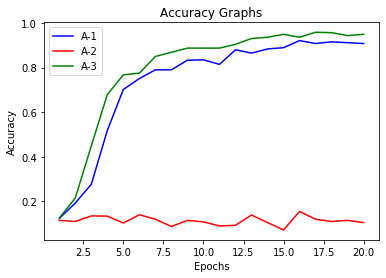

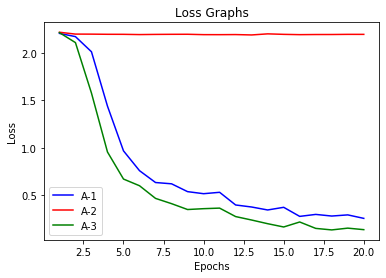

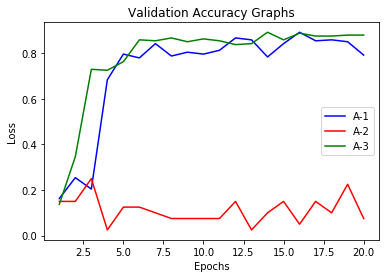

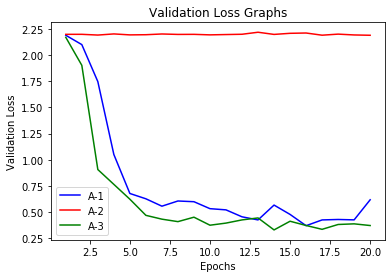

In [75]:
history_dict_1 = train_stats_1.history
history_dict_2 = train_stats_2.history
history_dict_3 = train_stats_3.history

train_histories = [history_dict_1,history_dict_2,history_dict_3] 
get_epochs_statistics(train_histories,epochs)

### Accuracy scores of different machine learning models

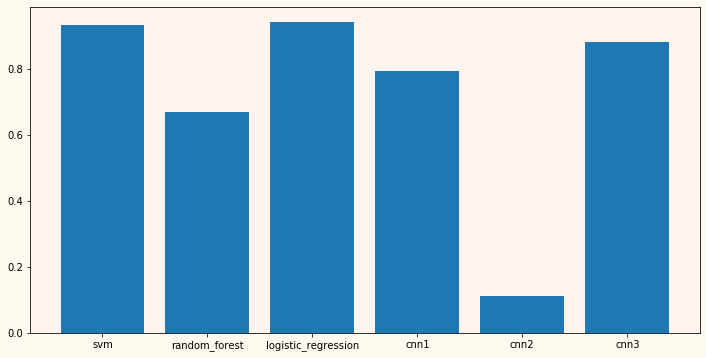

In [87]:
scores_1 = cnn1.evaluate(test_set,verbose=0)
scores_2 = cnn2.evaluate(test_set,verbose=0)
scores_3 = cnn3.evaluate(test_set,verbose=0)

labels = ['svm','random_forest','logistic_regression' ,'cnn1','cnn2','cnn3']
scores = [svm_acc,random_forest_acc,logistic_regression_acc, scores_1[1], scores_2[1], scores_3[1]]

create_histogram(labels,scores)

### Getting Metrics and confusion matrix with sklearn library

In [88]:
test_generator = test_set
train_generator = training_set

In [89]:
#Print the Target names
target_names = []
for key in test_generator.class_indices:
    target_names.append(key)

print(target_names)

['aliev_ilham', 'erdogan_redgep', 'lukashenko_alexandr', 'makron_emmanuel', 'merkel_angela', 'putin_vladimir', 'sin_ji_pin', 'trump_donald', 'zelenski_vladimir']


Confusion Matrix Training Set cnn1
Confusion matrix, without normalization
Confusion Matrix Test Set cnn1
Confusion matrix, without normalization


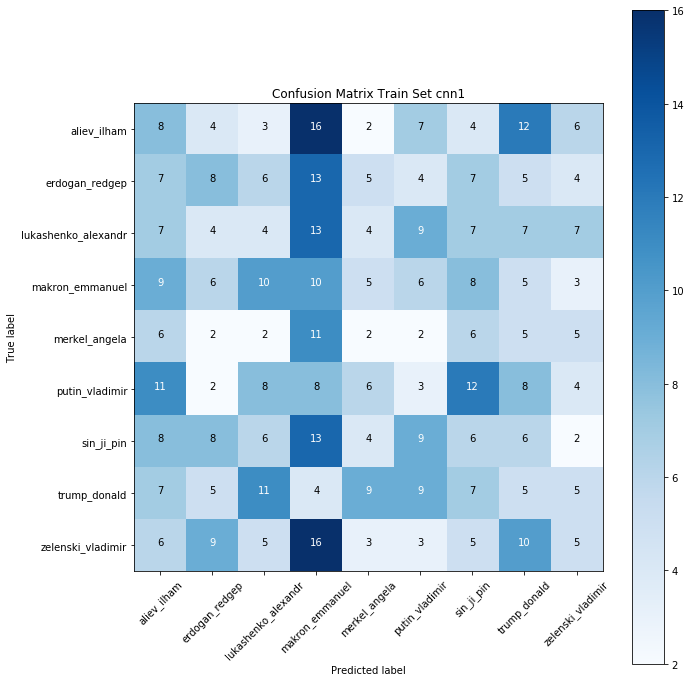

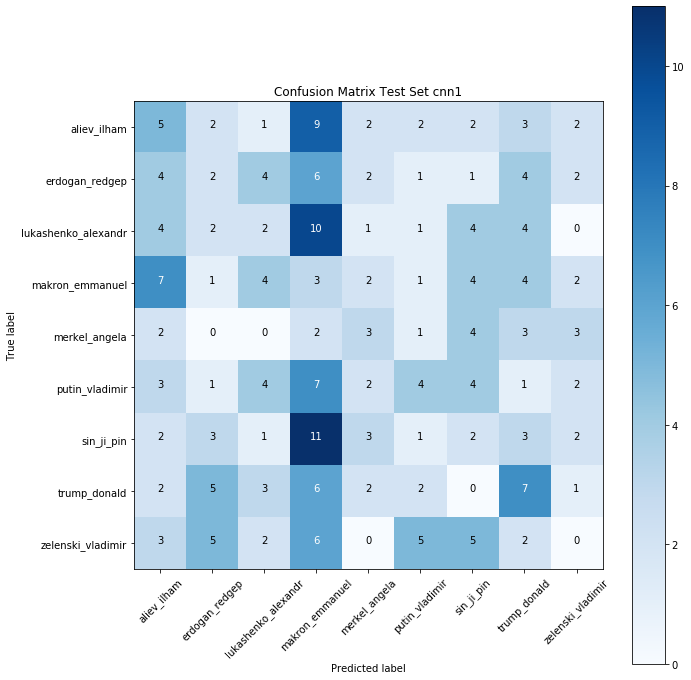

In [90]:
get_confusion_matrix(cnn1, 'cnn1')

Confusion Matrix Training Set cnn2
Confusion matrix, without normalization
Confusion Matrix Test Set cnn2
Confusion matrix, without normalization


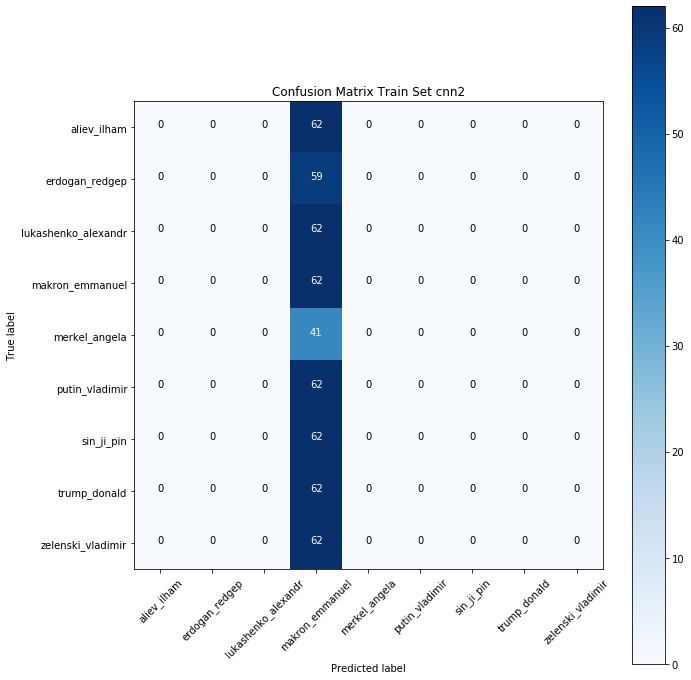

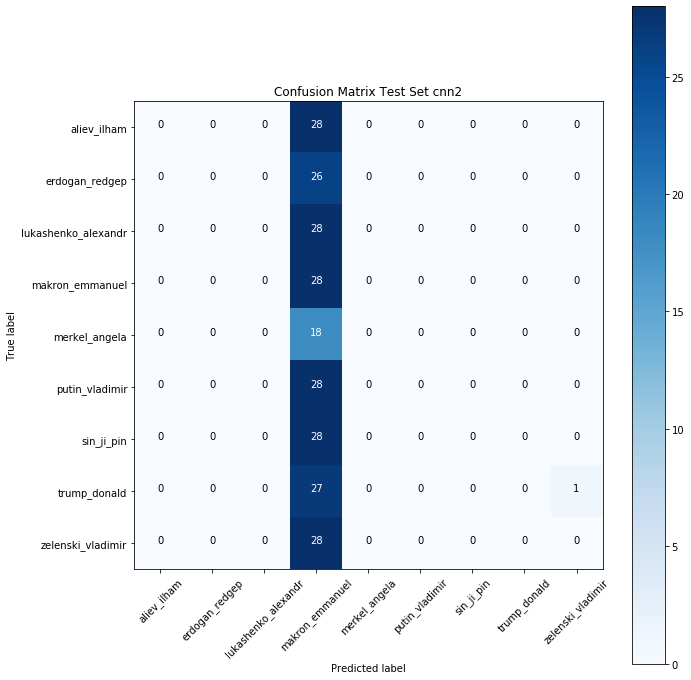

In [91]:
get_confusion_matrix(cnn2, 'cnn2')

Confusion Matrix Training Set cnn3
Confusion matrix, without normalization
Confusion Matrix Test Set cnn3
Confusion matrix, without normalization


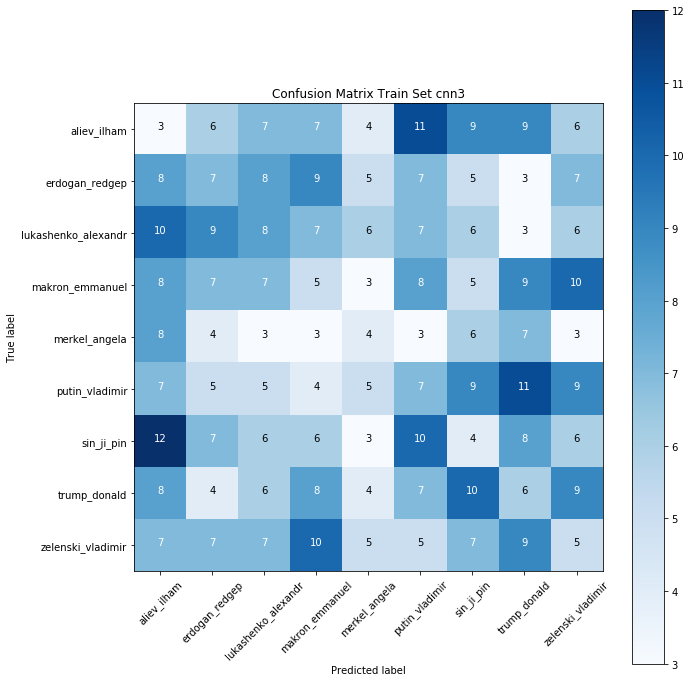

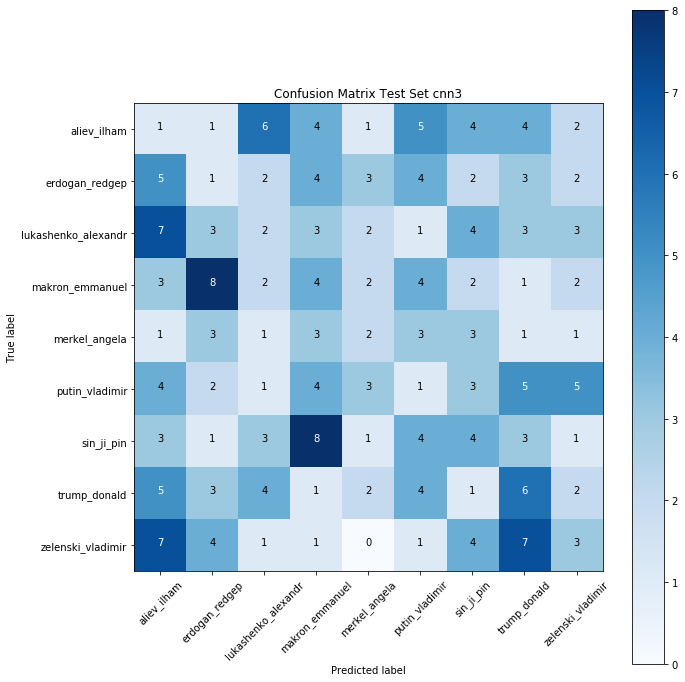

In [92]:
get_confusion_matrix(cnn3, 'cnn3')

In [93]:
get_metrics(cnn1,'cnn1')

model_name: cnn1


Accuracy -  (tp + tn) / (p + n) : 0.087500


Precision -  tp / (tp + fp): 0.083434


Rrecall -  tp / (tp + fn): 0.084249


F1 score -  2 tp / (2 tp + fp + fn): 0.079166


Cohens kappa: -0.028732


[[2 1 2 5 2 3 3 7 3]
 [5 3 1 4 2 3 2 3 3]
 [1 3 2 9 2 3 5 3 0]
 [4 2 2 7 3 1 4 5 0]
 [4 1 1 5 0 1 5 1 0]
 [6 2 2 8 4 1 1 3 1]
 [3 3 4 8 1 1 1 4 3]
 [3 3 5 7 1 2 2 3 2]
 [4 3 2 7 2 3 3 2 2]]


In [94]:
get_metrics(cnn2,'cnn2')

model_name: cnn2


Accuracy -  (tp + tn) / (p + n) : 0.116667


Precision -  tp / (tp + fp): 0.013017


Rrecall -  tp / (tp + fn): 0.111111


F1 score -  2 tp / (2 tp + fp + fn): 0.023304


Cohens kappa: 0.000000


[[ 0  0  0 28  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  1]
 [ 0  0  0 28  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0]]


In [95]:
get_metrics(cnn3,'cnn3')

model_name: cnn3


Accuracy -  (tp + tn) / (p + n) : 0.095833


Precision -  tp / (tp + fp): 0.090082


Rrecall -  tp / (tp + fn): 0.092491


F1 score -  2 tp / (2 tp + fp + fn): 0.090555


Cohens kappa: -0.019338


[[5 4 3 2 2 5 2 1 4]
 [0 4 4 6 4 3 0 5 0]
 [3 4 2 5 1 1 4 6 2]
 [4 3 3 2 1 3 6 2 4]
 [2 3 0 3 0 1 2 6 1]
 [7 1 3 5 2 1 3 3 3]
 [5 2 1 6 3 1 3 3 4]
 [6 4 1 1 1 5 5 4 1]
 [4 1 5 2 2 7 2 3 2]]


In [97]:
evaluating_set(cnn1, 'cnn1')
evaluating_set(cnn2, 'cnn2')
evaluating_set(cnn3, 'cnn3')

cnn1:


54/54 [==============================] - 2s 44ms/step - loss: 0.3004 - accuracy: 0.8764 0s - loss: 0.3255 - 


cnn2:


54/54 [==============================] - 2s 41ms/step - loss: 2.1917 - accuracy: 0.1161


cnn3:


54/54 [==============================] - 2s 36ms/step - loss: 0.1152 - accuracy: 0.9644




### Проект состоит из следующих этапов:

    1. Скачивание данных из интернета
    2. Отбор картинок производится с помощью технологии распознавания лиц opencv. Алгоритм отбора фотограйий заключается в следующем:
       если очерчивается лицо и находится два глаза, то тогда подразумевается что это полноценная качественная фотография
       с лицом одного человека.
    3. Далее идет ряд дополнительных преобразований по очистке и фильтрации картинок.
    4. Для обычных моделей машинного обучения создается дополнительная картинка на основе преобразования фурье, для выделения фич.
    5. Далее производится разделение картинок на тренировочную и тестувую выборку и заполнение структуры папок готовыми датасетами
    6. Собственномашинное обучение на основе трех моделей: метод опорных векторов, случайных деревьев и логистическая регрессия
    9. Производится оптимизация и выбор наиболее удачных моделей с помощью GridSearchCV.
    8. Построение графиков производительности, метрик, confusion matrix.
    9. Наиболее успешная модель сохраняется
    
    Глубокое обучение:
    
    1. С помощью скриптов картинки переносятся в специальную структуру для использования ImageDataGenerator
    2. Запускаются три модели нейросетей (для примера) и строятся сводные графики по метрикам accuracy, loss.
    3. В конце строятся метрики и пишутся выводы.

# Выводы по производительности

1. Метод опорных векторов, логистическая регрессия особенно удачны в классификации небольшого обьема картинок.
Это можно увидеть по сравнительным графикам accuracy.Метод случайных деревьев отработал хуже. Метрики: precision, recall, f1 
- также досточно неплохие. Все графики можно увидеть выше в данному ноутбуке в соответсвующих разделах.


2. Глубокие сети: данный обьем данных (100 картинок по каждой категории, 70% тренировочных 
 , 30%  тестовых) недостаточен для тренировки модели сверточной нейронной сети. Accuracy превышает 90%, однако метрики показывают случайный результат(около 10% по каждой из 9 категорий). Выводы - недостаточно данных для полноценного обучения
 нейросети. Доверять accuracy не имеет смысла в данном случае. Необходимо наверное минимум 1000 картинок а каждую категорию.
 Архитектуры:
     1. Модель 1 -Архитектура заключается в удваивании количества фильтров с каждым новым слоем - Работает
     2. Модель 2 -Увеличение размеров ядра фильтра 10*10 - Не работает,тсак как сеть не может захватить фичи, фильтрами такого         большого размера
     3. Добавлена регуляризация, плюс количество нейронов в полносвязном слое - производительность улучшилась по сравнению с первым вариантом
 
 
3. Цель проекта - показать прототип работы с данными и методам оценки и анализа. Но необходимо большее количтво данных (картинок) для обучения нейросети

In [ ]:
'''


img_name = '2.jpg'

img_full_path = './test_images/' + img_name

img = cv2.imread(img_full_path)
img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap='gray')

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5)

(x,y,w,h) = faces[0]
x,y,w,h

face_img = cv2.rectangle(img, (x,y),(x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y), (x+w, y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
cv2.imwrite('./test_images/cv_' + img_name, face_img)

cropped_image = get_cropped_image_if_2_eyes(img_full_path)

if cropped_image != None:
    plt.imshow(cropped_image)
    
original_image = cv2.imread(img_full_path)
plt.imshow(original_image)

'''